In [3]:
# Import libraries

import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import os

from src.functions_for_data_viz import collect_file_paths
from src.constants import SIZE
from src.functions_for_grad_cam import get_img_array, make_gradcam_heatmap, save_and_display_gradcam

In [4]:
# Load the saved model
model = load_model('models/pneumonia_detection_model_VGGFace.h5')

model.summary()

2024-05-31 18:40:37.518015: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-05-31 18:40:37.518049: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-31 18:40:37.518052: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-31 18:40:37.518265: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-31 18:40:37.518417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_input (Inpu  [(None, 224, 224, 3)]     0         
 tLayer)                                                         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                           

In [5]:
# SET UP IMAGES TEST PATH

# Path to images folder
images_path = 'images/'

# Path to test folder
test_folder = images_path + 'test'

# Lists to store file paths using a function in src for: test

test_NORMAL_paths = collect_file_paths(os.path.join(test_folder, 'NORMAL'))
test_PNEUMONIA_paths = collect_file_paths(os.path.join(test_folder, 'PNEUMONIA'))

# Max numbers of images
print("Number of files in test_NORMAL:", len(test_NORMAL_paths))
print("Number of files in test_PNEUMONIA:", len(test_PNEUMONIA_paths))

Number of files in test_NORMAL: 234
Number of files in test_PNEUMONIA: 390


1/1 [==============================] - 0s 75ms/step
Predicted: [[0.99999154]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


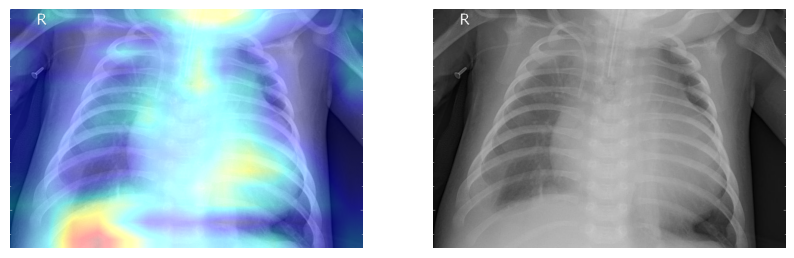

In [34]:
# GRAD CAM 

last_conv_layer_name = 'conv2d_12'  

img_number = 105

img_array = get_img_array(test_PNEUMONIA_paths[img_number], size=(SIZE, SIZE))
    
# Predict the class
preds = model.predict(img_array)
print(f"Predicted: {preds}")

# Generate Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Save and display Grad-CAM
save_and_display_gradcam(test_PNEUMONIA_paths[img_number], heatmap)